In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "/Users/nicolasjourdan/projects/temp/interq_cip_qhs/src/interq_cip_qhs/notebooks/example_data/cylinder_bottom/cnc_milling_machine/process_data/199000_12_14_2022_18_30_00/frontside_external_sensor_signals.h5"
with h5py.File(file_path) as f:
    data = np.array(f["data"])

In [4]:
data[100000:200000, 1:4] = np.nan

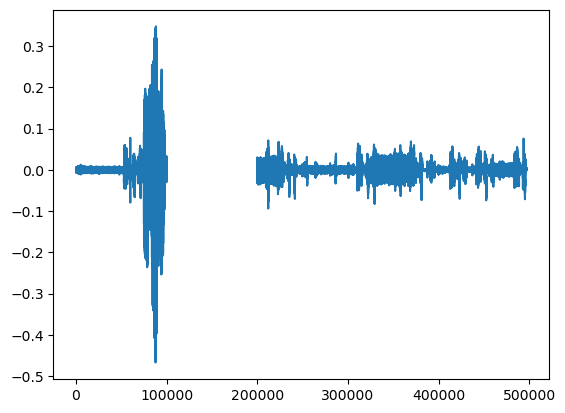

In [5]:
plt.plot(data[:, 1])

In [6]:
with h5py.File(file_path, "w") as file:
    file.create_dataset("data", data=data)

In [12]:
qc_data = pd.read_csv(
    "/Users/nicolasjourdan/projects/temp/interq_cip_qhs/src/interq_cip_qhs/notebooks/example_data/cylinder_bottom/cnc_milling_machine/quality_data/quality_data.csv",
    delimiter=";",
    encoding="latin1",
)
qc_data.set_index("part_id", inplace=True)

In [15]:
# can't use quality data from dataset because we need timestamp for quality hallmarks
milling_quality_data_with_ts_path = "/Users/nicolasjourdan/projects/temp/interq_cip_qhs/src/interq_cip_qhs/notebooks/example_data/cylinder_bottom/cnc_milling_machine/quality_data/quality_data_cylinder_bottom.csv"

from interq_cip_qhs.process.milling import MillingProcessData

reader = MillingProcessData()
keys = list(map(int, reader._part_id_paths.keys()))
keys.sort()
keys = np.array(keys)
start_idx = np.searchsorted(keys, 111501)  # 124504
keys = keys[start_idx : start_idx + 50]
print(keys)

# for key in keys:
#     jprint(reader.publish_process_QH_id(str(key)))

[115102 124404 199000]
